# #03 Geometry Creation
<i>Guide on how to create features (points, lines, surfaces and volumes)</i>
***

Connect to LUSAS and check if a model is open

In [ ]:
from shared.LPI import *
lusas = get_lusas_modeller()

if not lusas.existsDatabase():
    raise Exception("A model must be open before running this code")

## 1. Creating Points

In [ ]:
# The options and settings for creating all geometry in LUSAS is defined in the IFGeometryData object.
# To start any geometry creation, get the geometryData object and set all the defaults
geometry_data = lusas.geometryData().setAllDefaults()
# Here we are creating points by specifying the coordinates, we set the option in setLowerOrderGeometryType
geometry_data.setLowerOrderGeometryType("coordinates")

# Now we add the coordinates
geometry_data.addCoords(1.0, 1.0, 0.0)
geometry_data.addCoords(2.0, 2.0, 0.0)

# Now we instruct the database to the create the line. It will return an IFObject set containing the newly created points
object_set:'IFObjectSet' = lusas.database().createPoint(geometry_data)
# Get all points from the returned object set
points:list[IFPoint] = object_set.getObjects("Point")

# Loop through the points and print their ids and coordinates
for point in points:
    print(f"Point:{point.getID()} at coordinates ({point.getX()},{point.getY()},{point.getZ()}) ")

It is often useful to create a small helper function to wrap these settings as follows:

In [ ]:
def create_point(x:float, y:float, z:float) -> 'IFPoint':
    geometry_data = lusas.geometryData().setAllDefaults()
    geometry_data.setLowerOrderGeometryType("coordinates")
    geometry_data.addCoords(x, y, z)
    # Return the point object from the object set containing the newly created objects
    return win32.CastTo(lusas.database().createPoint(geometry_data).getObject("Point"), "IFPoint")

# Call the function to create a points
point1 = create_point(2.0, 1.0, 0.0)
point2 = create_point(3.0, 2.0, 0.0)

## 2. Creating Lines

### 2.1 Straight line By Coordinates

In [ ]:
# The options and settings for creating all geometry in LUSAS is defined in the IFGeometryData object.
# To start any geometry creation, get the geometryData object and set all the defaults
geometry_data = lusas.geometryData().setAllDefaults()
# Here we are creating a line by specifying the coordinates, we set the option in setLowerOrderGeometryType
geometry_data.setLowerOrderGeometryType("coordinates")
# We want a straight line
geometry_data.setCreateMethod("straight")
# Now we add the start and end coordinates
geometry_data.addCoords(0.0, 3.0, 0.0)
geometry_data.addCoords(3.0, 3.0, 0.0)
# Now we instruct the database to the create the line. It will return an IFObject set containing the newly created line
object_set:'IFObjectSet' = lusas.database().createLine(geometry_data)
# Get all points from the returned object set
lines:list[IFLine] = object_set.getObjects("Line")
# Loop through the lines and print their ids and coordinates
for line in lines:
    p1 = line.getStartPoint()
    p2 = line.getEndPoint()
    print(f"Line:{line.getID()} between points ({p1.getX()},{p1.getY()},{p1.getZ()}) to ({p2.getX()},{p2.getY()},{p2.getZ()}) ")

Create a helper function that can be re-used later

In [ ]:
def create_line_by_coordinates(x1:float, y1:float, z1:float, x2:float, y2:float, z2:float,) -> 'IFLine':
    geometry_data = lusas.geometryData().setAllDefaults()
    geometry_data.setLowerOrderGeometryType("coordinates")
    geometry_data.setCreateMethod("straight")
    geometry_data.addCoords(x1, y1, z1)
    geometry_data.addCoords(x2, y2, z2)
    newLine:IFLine = lusas.database().createLine(geometry_data).getObjects("Line")[0]
    return newLine

### 2.2 Arc line by cooordinates

In [ ]:
# The options and settings for creating all geometry in LUSAS is defined in the IFGeometryData object.
# To start any geometry creation, get the geometryData object and set all the defaults
geometry_data = lusas.geometryData().setAllDefaults()
# Here we are creating a line by specifying the coordinates, we set the option in setLowerOrderGeometryType
geometry_data.setLowerOrderGeometryType("coordinates")
# We want an arc
geometry_data.setCreateMethod("arc")
# Specify how we are supplying the coordinates, i.e Start->Middle->End
geometry_data.setStartMiddleEnd()
# Now we add the start middle end coordinates
geometry_data.addCoords(0.0, 4.0, 0.0)
geometry_data.addCoords(2, 5.0, 0.0)
geometry_data.addCoords(4.0, 4.0, 0.0)

# Now we instruct the database to the create the line. It will return an IFObject set containing the newly created line
object_set:'IFObjectSet' = lusas.database().createLine(geometry_data)
# Get all points from the returned object set
lines:list[IFLine] = object_set.getObjects("Line")
# Loop through the lines and print their ids and coordinates
for line in lines:
    p1 = line.getStartPoint()
    p2 = line.getEndPoint()
    print(f"Line:{line.getID()}, length:{line.getLineLength()} between points ({p1.getX()},{p1.getY()},{p1.getZ()}) to ({p2.getX()},{p2.getY()},{p2.getZ()}) ")

### 2.3 Circle

In [ ]:
radius = 6
z = 3.5
# The options and settings for creating all geometry in LUSAS is defined in the IFGeometryData object.
# To start any geometry creation, get the geometryData object and set all the defaults
geometry_data = lusas.geometryData().setAllDefaults()
# Specify the line by coordinate input
geometry_data.setLowerOrderGeometryType("coordinates")
# Specify defining a circle
geometry_data.makeCircle()
# Specify the meaning of the following coordinates 
geometry_data.setStartEndCentre()
# Start point at X=radius
geometry_data.addCoords(radius, 0.0, z)
# Specify the plane (X/Y)
geometry_data.addCoords(0.0, 1.0, z)
# Centre of the circle at the origin
geometry_data.addCoords(0.0, 0.0, z)
# Create the line in the database with the settings specified.
object_set:'IFObjectSet' = lusas.database().createLine(geometry_data)


### 2.4 Line from points

Existing points can also be used to create lines. This can be done adding the start and end points in an IFObjectSet. You can do so either by using each IFPoint object or by using each point's id:

In [ ]:
# Get id of second point
point2_id = point2.getID()
print(f"Point2 ID is {point2_id}")

# geometryData object contains all the settings to perform a geometry creation
geometry_data = lusas.geometryData().setAllDefaults()        
# set the options for creating straight lines from points
geometry_data.setCreateMethod("straight")
geometry_data.setLowerOrderGeometryType("points")
# Create an object set to contain the points and use this set to create the line
obs = lusas.newObjectSet()

# Add existing points to the object set
obs.add(point1) # Add first point IFPoint object
obs.add("point", point2_id) # Add second point using the ID

# Create the line, get the line objects array from the returned object set and return the 1 and only line
new_line:IFLine = obs.createLine(geometry_data).getObjects("Line")

Create a helper function that can be re-used later

In [ ]:
def create_line_from_points(p1:'IFPoint', p2:'IFPoint') -> 'IFLine':
     # geometryData object contains all the settings to perform a geometry creation
     geometry_data = lusas.geometryData().setAllDefaults()         
     # set the options for creating straight lines from points
     geometry_data.setCreateMethod("straight")        
     geometry_data.setLowerOrderGeometryType("points")
     # Create an object set to contain the points and use this set to create the line
     obs = lusas.newObjectSet()                 
     obs.add(p1)
     obs.add(p2)
     # Create the line, get the line objects array from the returned object set and return the 1 and only line
     return win32.CastTo(obs.createLine(geometry_data).getObject("Line"), "IFLine")

### 2.5 Line from Point translational sweep

In [ ]:
# Create a point
point1 = create_point(2.0, 1.0, 10.0)
point2 = create_point(3.0, 2.0, 10.0)

vector = [1, 0, 0] # sweep vector x, y, z


# Create a translation attribute
attr = lusas.db().createTranslationTransAttr("Temp_SweepTranslation", vector)
attr.setSweepType("straight")
attr.setHofType("Line") # Set target geometry

geom_data = lusas.newGeometryData()
geom_data.setMaximumDimension(1) # Target geometries (0: Points, 1: Lines, 2: Surfaces)
geom_data.setTransformation(attr)
geom_data.sweptArcType("straight")

# Create an object set to contain the points and be swept
obs = lusas.newObjectSet()                 
obs.add(point1)
obs.add(point2)

# Perform the sweep, the returned object set will contain the created lines
objSet = obs.sweep(geom_data)

# Delete the translation attribute
lusas.db().deleteAttribute(attr)

# Print new line IDs
newLines : list[IFLine] = objSet.getObjects("Lines")
for line in newLines:
    print(f"Line {line.getID()} created from sweep.")

The `Helpers.py` library contains functions for easier geometric sweeps.<br>For example the above block can be simplified to:
`sweep_points([point1, point2], [1, 0, 0])`<br>Similarly, for rotational sweep, the `sweep_points_rotationally([point1, point2], degrees)` function can be used.

### 2.6 Multiple Lines example

Create a circle of points and connect them with straight lines

In [ ]:
import math

radius = 10
intersections = 10 # Number of straight segments to approximate circle
z = 2

# Loop and create points
points = []
for i in range(0, intersections):
    theta = i * math.radians(360/intersections)
    x = radius * math.cos(theta)
    y = radius * math.sin(theta)
    point = create_point(x, y, z)
    # Store points in the list
    points.append(point)

# Create lines between each of the created points
for i in range(0, len(points)-1):
    create_line_from_points(points[i], points[i+1])
create_line_from_points(points[-1], points[0])

print(f"Created {len(points)} points and lines")

The previous block of code can be expanded to create a circular truss:<br><br>
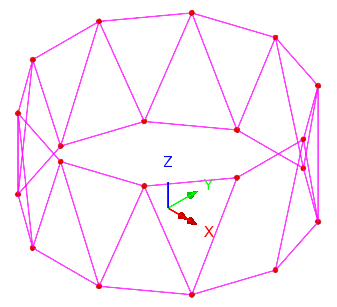

In [ ]:
import math

radius = 12
intersections = 10  # Number of straight segments to approximate circle
height = 10

start_angle = 0.0

points = []
for i in range(0, intersections):
    theta = i * math.radians(360/intersections)
    x = radius * math.cos(theta + start_angle)
    y = radius * math.sin(theta + start_angle)
    point = create_point(x, y, 0.0)
    points.append(point)

for i in range(0, len(points)-1):
    create_line_from_points(points[i], points[i+1])
create_line_from_points(points[-1], points[0])

start_angle = math.radians(360/intersections)/2
points2 = []
for i in range(0, intersections):
    theta = i * math.radians(360/intersections)
    x = radius * math.cos(theta + start_angle)
    y = radius * math.sin(theta + start_angle)
    point = create_point(x, y, height)
    points2.append(point)

for i in range(0, len(points2)-1):
    create_line_from_points(points2[i], points2[i+1])
create_line_from_points(points2[-1], points2[0])


for i in range(0, len(points)):
    create_line_from_points(points[i], points2[i])

for i in range(0, len(points2)-1):
    create_line_from_points(points2[i], points[i+1])

# Set isometric view (top side view point)
lusas.view().setIsometric()

## 3 Create Surfaces

### 3.1 Create a Surface by coordinates

In [ ]:
# Create a geometryData object to contain all the settings for the geometry creation
geometry_data = lusas.newGeometryData()
# set the options for creating geometries from coordinates
geometry_data.setCreateMethod("coons")
geometry_data.setLowerOrderGeometryType("coordinates")

# Specify surface coordinates
geometry_data.addCoords(0, 0, -5)
geometry_data.addCoords(1, 0, -5)
geometry_data.addCoords(1, 1, -5)
geometry_data.addCoords(0, 1, -5)

surface1 : IFSurface = lusas.db().createSurface(geometry_data).getObjects("Surface")[0]

Create a helper function that can be re-used later

In [ ]:
def create_surface_by_coordinates(x:list[float], y:list[float], z:list[float]) -> IFSurface:
    geometry_data = lusas.newGeometryData()
    geometry_data.setCreateMethod("coons")
    geometry_data.setLowerOrderGeometryType("coordinates")
    for i in range(len(x)):
        geometry_data.addCoords(x[i], y[i], z[i])
    surf : IFSurface = lusas.db().createSurface(geometry_data).getObjects("Surface")[0]
    return surf

# Create a surface using the function
xs = [0, 1, 1, 0]
ys = [0, 0, 1, 1]
zs = [-4, -4, -4, -4]
surface2 = create_surface_by_coordinates(xs, ys, zs)

### 3.2 Create a Surface by Lines

In [ ]:
# Create the perimeter lines
lines = [
    create_line_by_coordinates(0, 0, -1, 1, 0, -1),
    create_line_by_coordinates(1, 0, -1, 1, 1, -1),
    create_line_by_coordinates(1, 1, -1, 0, 1, -1),
    create_line_by_coordinates(0, 1, -1, 0, 0, -1),
]

# Create a geometryData object to contain all the settings for the geometry creation
geometry_data = lusas.geometryData().setAllDefaults()
# set the options for creating geometries from lines
geometry_data.setCreateMethod("coons")
geometry_data.setLowerOrderGeometryType("lines")
# Create an object set to contain the lines and use this set to create the surface
linesObj = lusas.newObjectSet()
linesObj.add(lines)
# Create the surface using the lines
new_surface : IFSurface = linesObj.createSurface(geometry_data).getObjects("Surface")[0]

### 3.4 Surface from Line translational sweep

In [ ]:
# Create a line
line = create_line_by_coordinates(0, 0, 5, 1, 0, 5)

vector = [0, 0, 1] # sweep vector x, y, z

# Create a translation attribute
attr = lusas.db().createTranslationTransAttr("Temp_SweepTranslation", vector)
attr.setSweepType("straight")
attr.setHofType("Surface") # Set target geometry

geom_data = lusas.newGeometryData()
geom_data.setMaximumDimension(2) # Target geometries (0: Points, 1: Lines, 2: Surfaces)
geom_data.setTransformation(attr)
geom_data.sweptArcType("straight")

# Create an object set to contain the points and be swept
obs = lusas.newObjectSet().add(line)

# Perform the sweep, the returned object set will contain the created surfaces
objSet = obs.sweep(geom_data)

# Delete the translation attribute
lusas.db().deleteAttribute(attr)

# Print new line IDs
newSurfaces : list[IFSurface] = objSet.getObjects("Surface")
for surface in newSurfaces:
    print(f"Surface {surface.getID()} created from sweep.")

The `Helpers.py` library contains functions for easier geometric sweeps.<br>For example the above block can be simplified to:
`sweep_lines([line], [0, 0, 1])`<br>Similarly, for rotational sweep, the `sweep_lines_rotationally([line], degrees)` function can be used.

## 4 Create Volumes

### 4.1 Create a Volumes from Surfaces

In [ ]:
# Create a list of surfaces to be used in the volume creation
surfaces = [
    create_surface_by_coordinates([0,1,1,0], [0,0,1,1], [0,0,0,0]), #Bottom Surface (z=0)
    create_surface_by_coordinates([0,1,1,0], [0,0,1,1], [1,1,1,1]), #Top Surface (z=1)
    create_surface_by_coordinates([0,1,1,0], [0,0,0,0], [0,0,1,1]), #Front Surface (y=0)
    create_surface_by_coordinates([0,1,1,0], [1,1,1,1], [0,0,1,1]), #Back Surface (y=1)
    create_surface_by_coordinates([0,0,0,0], [0,1,1,0], [0,0,1,1]), #Left Surface (x=0)
    create_surface_by_coordinates([1,1,1,1], [0,1,1,0], [0,0,1,1]), #Right Surface (x=1)
]

# Create a geometryData object to contain all the settings for the geometry creation
geom_data = lusas.newGeometryData()
# set the options for creating geometries from surfaces
geom_data.setCreateMethod("solidVolume")
geom_data.setExtractAllVolumes()
# create an object set to contain the surfaces and use this set to create the volume
surfsObj = lusas.newObjectSet()
surfsObj.add(surfaces)
# Create the volume using the surfaces
vlm : IFVolume = lusas.db().createVolume(geom_data).getObjects("Volume")[0]

### 4.2 Volume from Surface translational sweep

In [ ]:
# Create a surface
surface = create_surface_by_coordinates([0,1,1,0], [0,0,1,1], [4,4,4,4])

vector = [0, 0, 1] # sweep vector x, y, z


# Create a translation attribute
attr = lusas.db().createTranslationTransAttr("Temp_SweepTranslation", vector)
attr.setSweepType("straight")
attr.setHofType("Volume") # Set target geometry

geom_data = lusas.newGeometryData()
geom_data.setMaximumDimension(3) # Target geometries (0: Points, 1: Lines, 2: Surfaces)
geom_data.setTransformation(attr)
geom_data.sweptArcType("straight")

# Create an object set to contain the points and be swept
obs = lusas.newObjectSet().add(surface)

# Perform the sweep, the returned object set will contain the created surfaces
objSet = obs.sweep(geom_data)

# Delete the translation attribute
lusas.db().deleteAttribute(attr)

# Print new line IDs
newVolumes : list[IFVolume] = objSet.getObjects("Volume")
for volume in newVolumes:
    print(f"Volume {volume.getID()} created from sweep.")

The `Helpers.py` library contains functions for easier geometric sweeps.<br>For example the above block can be simplified to:
`sweep_surfaces([surface], [0, 0, 1])`<br>Similarly, for rotational sweep, the `sweep_surfaces_rotationally([surface], degrees)` function can be used.